# Régressions Polynomiale avec python
# Alexis Araujo

## Exercice 1

In [3]:
#Importation des librairies
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

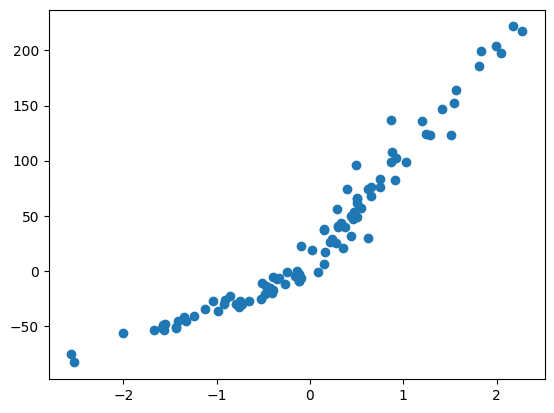

In [4]:
# Création du dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)
# Affichage des données
plt.scatter(x,y)

In [24]:
# Assurer que les dimensions de nos données sont cohérentes
y=y.reshape(y.shape[0], 1)
print(x.shape, y.shape)

(100, 1) (100, 1)


In [7]:
# Création de la matrice dataset (2D colonne x et une colonne de 1)
X=np.hstack((x, np.ones(x.shape)))
X=np.hstack((x**2,X))
print(X.shape)
X

(100, 3)


array([[ 8.97952932e-02,  2.99658628e-01,  1.00000000e+00],
       [ 7.50420886e-01,  8.66268368e-01,  1.00000000e+00],
       [ 2.30106604e-01, -4.79694282e-01,  1.00000000e+00],
       [ 7.25828002e-02, -2.69411953e-01,  1.00000000e+00],
       [ 1.08503366e+00, -1.04164949e+00,  1.00000000e+00],
       [ 4.02828230e+00, -2.00705812e+00,  1.00000000e+00],
       [ 1.07900782e-01,  3.28482545e-01,  1.00000000e+00],
       [ 1.91968129e-01,  4.38141677e-01,  1.00000000e+00],
       [ 7.36361359e-01, -8.58115003e-01,  1.00000000e+00],
       [ 2.44786963e+00, -1.56456691e+00,  1.00000000e+00],
       [ 4.20406182e+00,  2.05038090e+00,  1.00000000e+00],
       [ 1.95299284e-02, -1.39749520e-01,  1.00000000e+00],
       [ 2.25070125e-02,  1.50023373e-01,  1.00000000e+00],
       [ 1.06324826e+00,  1.03113930e+00,  1.00000000e+00],
       [ 5.74216169e-01, -7.57770525e-01,  1.00000000e+00],
       [ 4.26405545e-01, -6.52997355e-01,  1.00000000e+00],
       [ 2.50099501e+00, -1.58145345e+00

In [10]:
# Itialisation des coefficients du modèle pour inclure les nouveaux termes
theta=np.random.randn(3,1)
theta

array([[ 1.60845925],
       [-0.41926026],
       [-1.15946703]])

In [12]:
# Définition du modèle régression linéaire
def model (X, theta):
    return X.dot(theta)
model(X, theta)

array([[-1.14066991],
       [-0.31563752],
       [-0.58823318],
       [-0.92976683],
       [ 1.02248764],
       [ 6.16134062],
       [-1.12363269],
       [-1.03438951],
       [ 0.38471374],
       [ 3.43379226],
       [ 4.74295187],
       [-1.06946251],
       [-1.18616425],
       [ 0.11840874],
       [ 0.08183935],
       [-0.19983524],
       [ 3.52632212],
       [-1.03226432],
       [-1.09058345],
       [-0.01111493],
       [-1.18626558],
       [-1.16597015],
       [ 0.05079414],
       [-0.73858065],
       [-1.10263826],
       [-0.73751608],
       [-0.60538768],
       [-0.51264766],
       [ 2.21583219],
       [-1.15123717],
       [ 0.97583692],
       [-0.73126199],
       [-1.18377735],
       [-1.05017166],
       [-0.79949774],
       [-1.07634612],
       [-0.85080582],
       [ 2.65804246],
       [-1.10515539],
       [-0.96694193],
       [ 1.48032384],
       [-0.95684603],
       [ 5.56445413],
       [-1.07363889],
       [ 4.38257663],
       [ 2

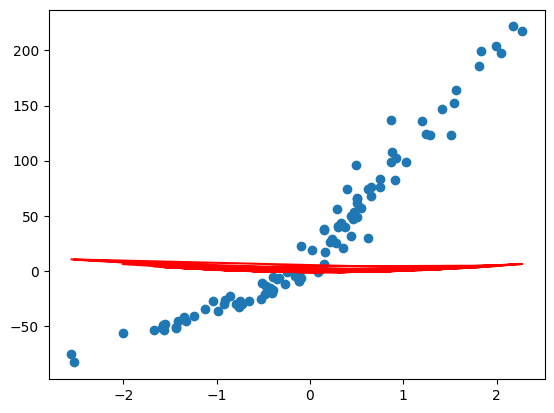

In [13]:
# Affichage de la prédiction au données du modèle
plt.scatter(x,y)
plt.plot(x, model(X,theta), c='r')

In [14]:
# Fonction de cout  (évaluation des performances)
def cout(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)
cout(X,y,theta)

2966.7434554940473

In [15]:
# Calcul de dérivé (gradient)
def grad(X, y, theta):
    m=len(y)
    return (1/m)*X.T.dot(model(X,theta)-y)
grad(X,y,theta)

array([[-48.54928873],
       [-68.48371731],
       [-29.98642537]])

In [17]:
# Algorithme itératif de descente de gradient
def DG (X,y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta=theta-learning_rate*grad(X,y, theta)
        histCout[i]=cout(X,y,theta)
    return theta, histCout
thetaF, histCout = DG(X,y,theta, learning_rate=0.01, n_iterations=1000)
thetaF, histCout

(array([[13.45988257],
        [67.77089126],
        [16.28202245]]),
 array([2888.04371195, 2812.31494298, 2739.40408174, 2669.16741902,
        2601.46999236, 2536.18501595, 2473.19334842, 2412.38299623,
        2353.64865   , 2296.89125181, 2242.01759124, 2188.93992823,
        2137.57564107, 2087.84689768, 2039.68034882, 1993.00684146,
        1947.76115134, 1903.88173309, 1861.31048691, 1819.99254074,
        1779.8760467 , 1740.91199103, 1703.05401655, 1666.25825677,
        1630.48318092, 1595.68944919, 1561.83977743, 1528.89881069,
        1496.83300511, 1465.61051744, 1435.20110183, 1405.57601329,
        1376.7079175 , 1348.57080636, 1321.13991913, 1294.39166861,
        1268.30357206, 1242.85418666, 1218.02304901, 1193.79061859,
        1170.13822479, 1147.04801736, 1124.50291999, 1102.48658681,
        1080.98336174, 1059.97824026, 1039.45683374, 1019.4053359 ,
         999.8104914 ,  980.65956641,  961.94032097,  943.64098309,
         925.75022442,  908.25713744,  891.15

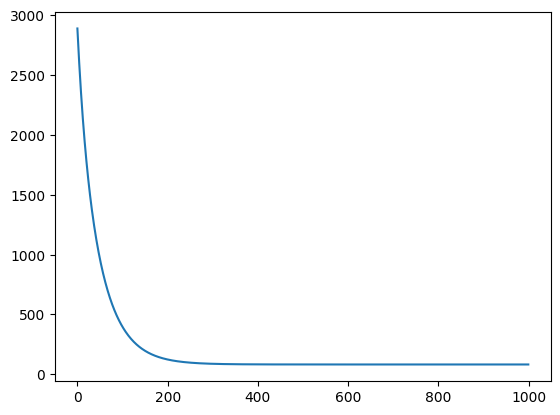

In [19]:
# Dessin de la courbe
plt.plot(range(1000),histCout)

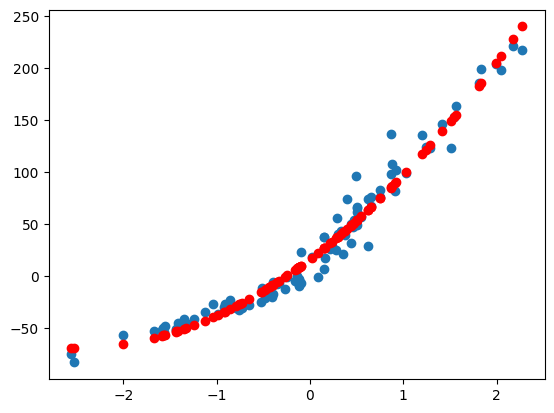

In [20]:
# Affichage de la prédiction
prediction=model(X, thetaF)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], prediction, c='r')

In [22]:
# Coefficient de détermination (un coeff à 1, le modèle est meilleure)
def coefDet(y, prediction):
    u=((y-prediction)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v
coefDet(y, prediction)

0.967280284818309